In [33]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_csv('titanic.csv')
data=df.drop(['Name','Sex','Ticket'], axis = 1)
# define input and output feature
x = data.drop(['Embarked','PassengerId'],axis=1)
y = data.Embarked
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [32]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 0.483669	training's multi_logloss: 0.483669	valid_0's multi_logloss: 0.627638	valid_0's multi_logloss: 0.627638
[40]	training's multi_logloss: 0.378068	training's multi_logloss: 0.378068	valid_0's multi_logloss: 0.618967	valid_0's multi_logloss: 0.618967
[60]	training's multi_logloss: 0.313316	training's multi_logloss: 0.313316	valid_0's multi_logloss: 0.637141	valid_0's multi_logloss: 0.637141
[80]	training's multi_logloss: 0.263483	training's multi_logloss: 0.263483	valid_0's multi_logloss: 0.669067	valid_0's multi_logloss: 0.669067
[100]	training's multi_logloss: 0.228567	training's multi_logloss: 0.228567	valid_0's multi_logloss: 0.703854	valid_0's multi_logloss: 0.703854


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.09, max_depth=-5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [43]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)*100))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)*100))

Training accuracy 94.2857
Testing accuracy 74.6377


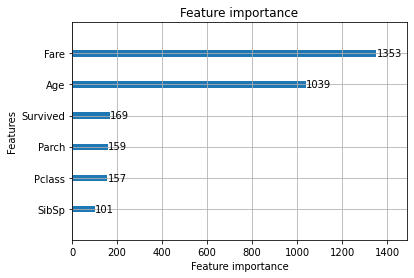

In [27]:
lgb.plot_importance(model)

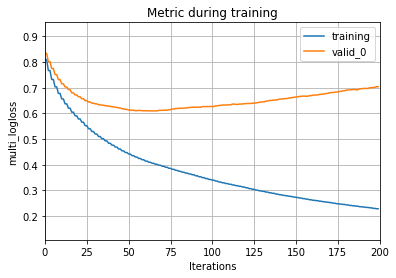

In [28]:
lgb.plot_metric(model)

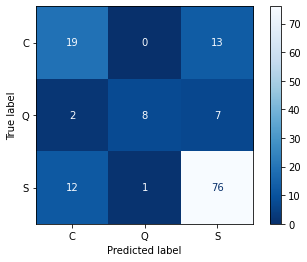

In [29]:
metrics.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')

In [30]:
print(metrics.classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           C       0.58      0.59      0.58        32
           Q       0.89      0.47      0.62        17
           S       0.79      0.85      0.82        89

    accuracy                           0.75       138
   macro avg       0.75      0.64      0.67       138
weighted avg       0.75      0.75      0.74       138

